In [7]:
from clustering import MeanShift
from clustering import KMeans
from clustering import MiniBatchKMeans

from utils import generate_random
from utils import animated_plot
from utils import plot
from utils import animation_to_html

import numpy as np

from IPython.display import HTML

In [2]:
data = generate_random()

## Mean Shift

To apply clustering to a data, a cluster object has to be created, which is in this case a MeanShift instance. By invoking the object's fit method with the data (2D Numpy array) as parameter, the returned value will be the indexes of the clusters for the data points in the same order as it was provided in the input parameter.

In [3]:
%%capture
ms = MeanShift(kernel='gaussian', bandwidth=1)
labels = ms.fit(data)
animation = animated_plot(ms.history[:10], labels, show=False).to_html5_video()

INFO:tensorflow:Clustering finished in 28 iterations with 6.9306e-06 shift delta.
INFO:tensorflow:Proceeding to post-processing.


In [4]:
HTML(animation)

To assign a cluster to new data point(s), the cluster object's predict method can be used. It will calculate the nearest centroid for each entry and return the labels, analogously to the fit method.

In [5]:
x = np.array([[-10, -10], [-3, -3], [2, 2]])
ms.predict(x)

array([2, 1, 0], dtype=int32)

## K-Means

INFO:tensorflow:Clustering finished in 6 iterations with 0.0 shift delta.
INFO:tensorflow:Proceeding to post-processing.


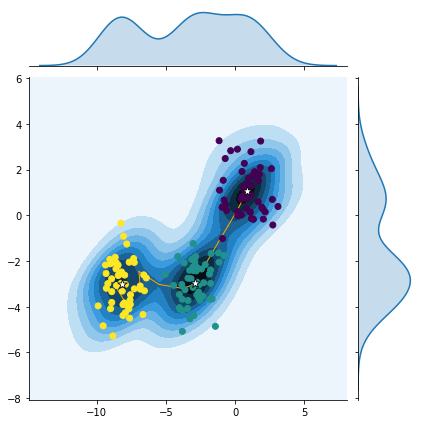

In [8]:
ms = KMeans(n_clusters=3)
labels = ms.fit(data)

plot(ms.history, data, labels, ms.centroids)